# Part 3: Understanding evaluation metrics for classification
In this section, you will explore different metrics that can be used for classification. For this purpose, we will be studying the [Pima Indians Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). 

The goal is to train a classifier to diagnose (predict) diabetes given a set of input features.

You will use the evaluation metrics you implemented to assess the quality of your model.

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

# We will be using the metrics that you implemented in part 1
import metrics

As before, let's load the dataset and then do some exploration of the data. You may add further analyses if you consider it necessary.

In [2]:
# Let's load the dataset
diabetes = pd.read_csv('../data/diabetes.csv', sep=",")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


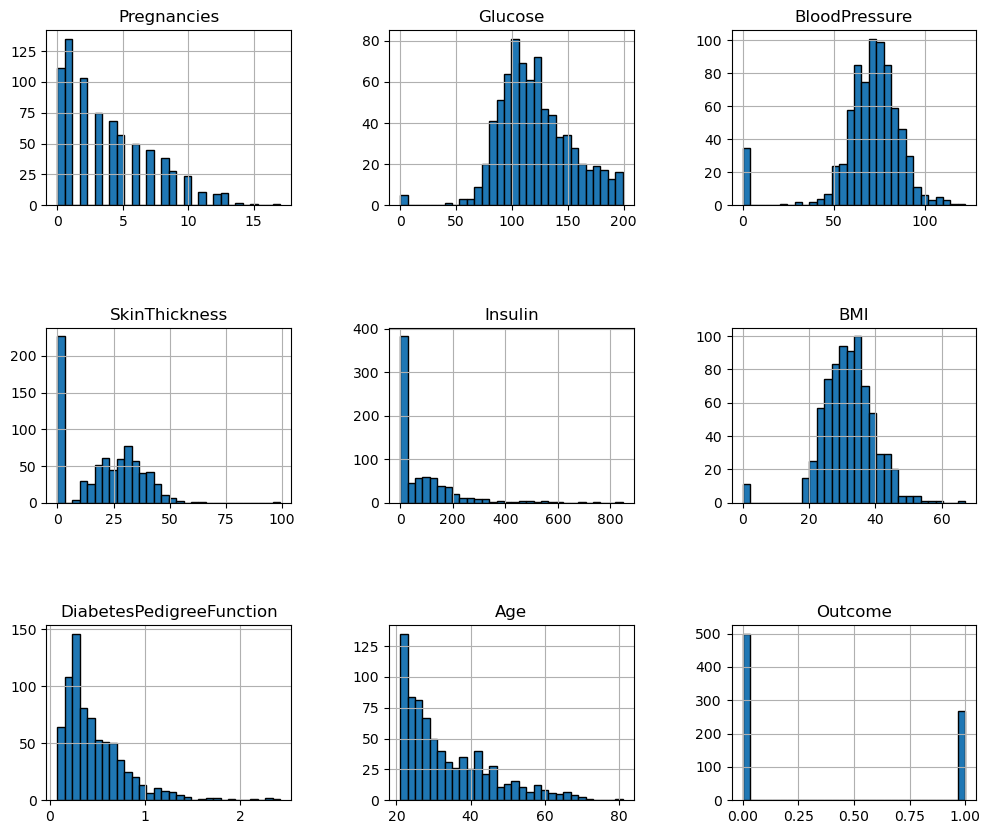

In [3]:
diabetes.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

**Question**: What can you say about the distribution of the different features?

**Answer**: Some features, as Glucose, BloodPressure and BMI are normal distributions. Pregnancies, DiabetesPedigreeFunction and Age are right-skewed distributions.  SkinThickness and Insulin have most of the samples in the lowest value. Outcome instead is 0 or 1. 

Now, let's move into training a classifier. 

As in part 2, we will train a single model without focusing on the task of model selection. In real-life problems, you cannot do this, as you will need to explore different options that can lead to the best model possible (the one that generalizes best).

We create a function fit_and_test that will receive a training set to train a model using linear discriminant analysis (LDA) and a test set for prediction using the previously trained model. 

*Note:* Any other classifier could have been used. You are free to test other classifier algorithms already covered in the course.

In [4]:
def fit_and_test(X_train, y_train, X_test):
    #Create an LDA model
    model = LinearDiscriminantAnalysis()

    # Train the model
    model.fit(X_train, y_train)


    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    return y_pred

Now, let's train and test. As we are not going to do model selection, in this lab we will do one split of the data into training and testing. The training data will not be furthe split into train and validation. 

**Remember this should not be done when solving a machine learning problem.**

In [7]:
# Storing inputs and output into X and y
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We call fit_and_test to first train and then infer new prices for the test set
y_pred = fit_and_test(X_train, y_train, X_test)

### How good is this model?

Use the metrics that you implemented in part one to evaluate the model. Use the cell below for your experiments:

In [11]:
## YOUR CODE HERE
accuracy = metrics.accuracy(y_pred, y_test)
precision = metrics.precision(y_pred, y_test)
recall = metrics.recall(y_pred, y_test)
f1 = metrics.f1_score_metric(y_pred, y_test)

#Print the results
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Accuracy:  0.7597402597402597
Precision:  0.6607142857142857
Recall:  0.6727272727272727
F1 Score:  0.6666666666666666


**Question:** Which metrics did you choose? Justify your answer.

**Answer:**
- Accuracy: Useful to understand how many of the predicted cases are correct;
- Precision: Useful to understand how many of the predicted positive cases are actually positive;
- Recall: Useful to understand how many of the actual positive cases were predicted as positive;
- F1 Score: Useful to understand the balance between precision and recall.


**Question:** Analyze the specific values of the chosen metrics in the context of the problem to understand the model's accuracy. Is it a good or a bad model? Provide a detailed justification of your answer.

**Answer:**  The results of the metrics shows that the model accuracy is acceptable, as well as the precision. This means that the model is able to predict the positive cases with a decent precision. F1 has a good value, which means that the model is able to balance precision and recall. Recall value shows that the model has been able to predict the actual positive cases with a good rate.

**Question:** What is precision telling you about the disease? recall? and F1 score?

**Answer:** 
- The precision measures how many of the predicted positive cases are actually positive. In this case, if the model predicts that a patient is positive, it is correct in 66% of the cases.
- The recall tells how confident the model is to predict that a sample is positive if it is actually positive. In this case, if the patient is positive, the model is able to predict correctly in 67% of the cases.
- F1-score evaluates the balance between precision and recall and penalizes extreme values on either of these metrics. In this case, the two metrics are balanced, so the value is good.

### Imbalanced data
Now we will repeat the exercise simulating a scenario of highly imbalanced datasets. In healthcare applications, for instance, it is common that there will be a large number of healthy cases and a few pathological ones.

We will simulate this scenario by removing some rows from diabetic patients. Then, we will see how these affect the evaluation metrics.

In [12]:
# Identify rows with target label 1
target_1_indices = diabetes[diabetes['Outcome'] == 1].index

# Randomly select 80% of the indices
num_to_remove = int(len(target_1_indices) * 0.8)
indices_to_remove = np.random.choice(target_1_indices, num_to_remove, replace=False)

# Remove the selected rows from the DataFrame
diabetes = diabetes.drop(indices_to_remove)


In [13]:
# Split the data into features and target
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We call fit_and_test to first train and then infer new prices for the test set
y_pred = fit_and_test(X_train, y_train, X_test)

Use the metrics that you implemented in part one to evaluate the model. Use the cell below for your experiments:

In [14]:
## YOUR CODE HERE
accuracy = metrics.accuracy(y_pred, y_test)
precision = metrics.precision(y_pred, y_test)
recall = metrics.recall(y_pred, y_test)
f1 = metrics.f1_score_metric(y_pred, y_test)

#Print the results
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Accuracy:  0.8918918918918919
Precision:  0.2857142857142857
Recall:  0.2222222222222222
F1 Score:  0.25


**Question:** What can you say about this model?

**Answer:** The model is not good. The accuracy is high, but the precision is very low, which means that the model is not able to predict the positive cases correctly. The recall is also low, which means that the model is not able to predict the actual positive cases correctly. The F1 score value is low since the precision and recall values are low.

**Question:** Which metrics provide the most useful information? Investigate and propose a solution 

**Answer:** Since the model is unbalanced, the precision and recall give us how well the model performs on the small number of true positives. In this case, they are very low, meaning that the model is not good if the goal is to predict the positive cases. A solution could be to balance the dataset, for example using a stratified split.